In [26]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("/home/cgarcia_2002/nHits_count")

import functions_nHits  # Importa la función que necesitas
import importlib

importlib.reload(functions_nHits)

<module 'functions_nHits' from '/home/cgarcia_2002/nHits_count/functions_nHits.py'>

In [27]:
root_file_path_bkg = "/data/cgarcia_2002/WCTE/data/2384_calib_time/WCTE_offline_R2384S0P0.root"
root_file_path_sig = "/data/cgarcia_2002/WCTE/data/2385_calib_time/WCTE_offline_R2385S0P0.root"

# Open the ROOT file and get the TTree
file_bkg = uproot.open(root_file_path_bkg)
file_sig = uproot.open(root_file_path_sig)

tree_bkg = file_bkg["WCTEReadoutWindows"]  
tree_sig = file_sig["WCTEReadoutWindows"]

print(tree_bkg.num_entries)
print(tree_sig.num_entries)


1800
1185


In [28]:
values_bkg = tree_bkg["hit_pmt_calibrated_times"].array(library="np")  # e.g., "eventID"
values_sig = tree_sig["hit_pmt_calibrated_times"].array(library="np")  # e.g., "eventID"

values_bkg_cutSignal = values_bkg[:len(values_sig)] #cortamos el background para que tenga la misma longitud que la señal, tantos eventos como la señal

nDetections_event_bkg = []
nDetections_event_sig = []

for x in values_bkg_cutSignal:
    nDetections_event_bkg.append(len(x))

for x in values_sig:
    nDetections_event_sig.append(len(x))

print(len(values_bkg))
print(len(values_sig))

1800
1185


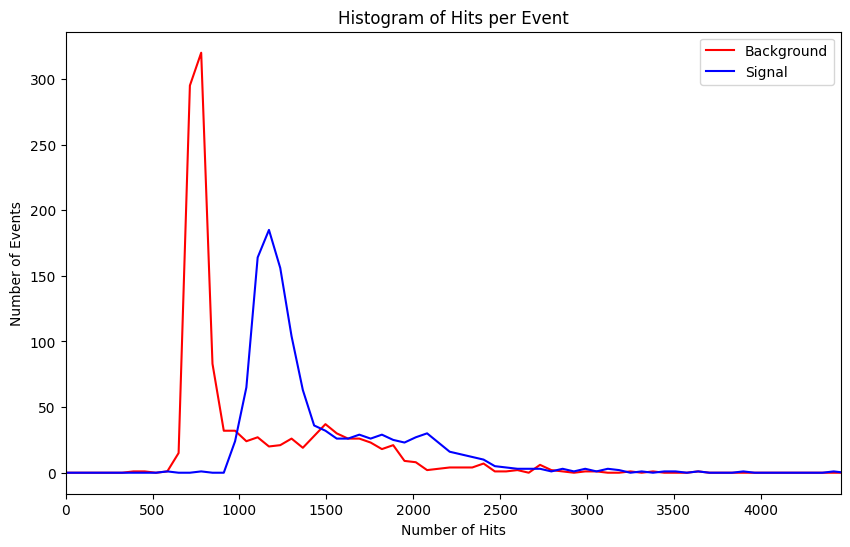

In [29]:

max_hist = 6500
n_bins = 100
bin_hist = max_hist / n_bins  

histogram_bkg = np.zeros(n_bins)  
histogram_sig = np.zeros(n_bins)  

histogram_bkg = functions_nHits.count_nHits(np.array(nDetections_event_bkg), bin_hist, histogram_bkg)
histogram_sig = functions_nHits.count_nHits(np.array(nDetections_event_sig), bin_hist, histogram_sig)

plt.style.use('default')  # Asegura el estilo claro

plt.figure(figsize=(10, 6), facecolor='white')
plt.plot(np.arange(0, max_hist, bin_hist), histogram_bkg, label='Background', color='red')
plt.plot(np.arange(0, max_hist, bin_hist), histogram_sig, label='Signal', color='blue')
plt.xlim(0, max(max(nDetections_event_bkg), max(nDetections_event_sig)))
plt.legend()
plt.xlabel('Number of Hits')
plt.ylabel('Number of Events')
plt.title('Histogram of Hits per Event')

plt.savefig("/home/cgarcia_2002/nHits_count/Plots_2meeting/Sig_bkg_HitsEvento.png", facecolor='white')
plt.show()

Text(0.5, 1.0, 'Histogram of Hits per Event')

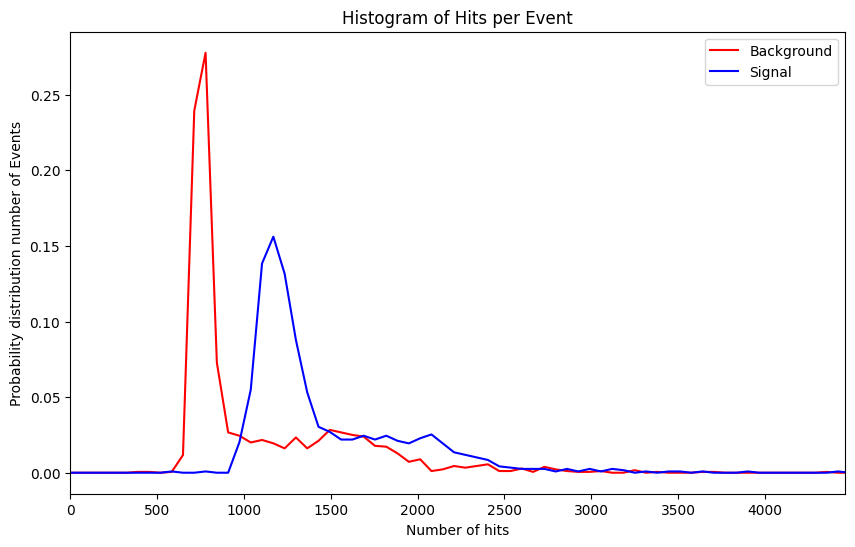

In [30]:
"""NORMALIZATION EN VEZ DE CORTAR EL BACKGROUND"""
nDetections_event_bkg = []
for x in values_bkg:
    nDetections_event_bkg.append(len(x))

histogram_bkg = np.zeros(n_bins)  
histogram_sig = np.zeros(n_bins)  

histogram_bkg = functions_nHits.count_nHits(np.array(nDetections_event_bkg), bin_hist, histogram_bkg)
histogram_sig = functions_nHits.count_nHits(np.array(nDetections_event_sig), bin_hist, histogram_sig)

histogram_bkg, _ = np.histogram(nDetections_event_bkg, bins=np.arange(0, max_hist + bin_hist, bin_hist))
histogram_sig, _ = np.histogram(nDetections_event_sig, bins=np.arange(0, max_hist + bin_hist, bin_hist))

plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, max_hist, bin_hist), histogram_bkg/len(values_bkg), label='Background', color='red')
plt.plot(np.arange(0, max_hist, bin_hist), histogram_sig/len(values_sig), label='Signal', color='blue')
plt.xlim(0, max(max(nDetections_event_bkg), max(nDetections_event_sig)))
plt.legend()
plt.xlabel('Number of hits')
plt.ylabel('Probability distribution number of Events')
plt.title('Histogram of Hits per Event')

In [31]:
event_number_branch_sig = tree_sig["event_number"].array(library="np")

bin_hits = 4000  #dividing windows along 270000 ns
times_array = np.arange(0, 270000+1, bin_hits, dtype=int)

nHits_bkg = np.zeros((tree_bkg.num_entries, len(times_array)))
nHits_sig = np.zeros((tree_sig.num_entries, len(times_array)))

for times, event_number in zip(values_sig, event_number_branch_sig):

    nHits_sig[event_number, :] = functions_nHits.count_nHits(times, bin_hits, nHits_sig[event_number, :])

In [32]:
event_number_branch_bkg = tree_bkg["event_number"].array(library="np")

for times, event_number in zip(values_bkg, event_number_branch_bkg):

    nHits_bkg[event_number, :] = functions_nHits.count_nHits(times, bin_hits, nHits_bkg[event_number, :])

(1185, 68)
(1800, 68)


Text(0.5, 0, 'Tiempo (ns)')

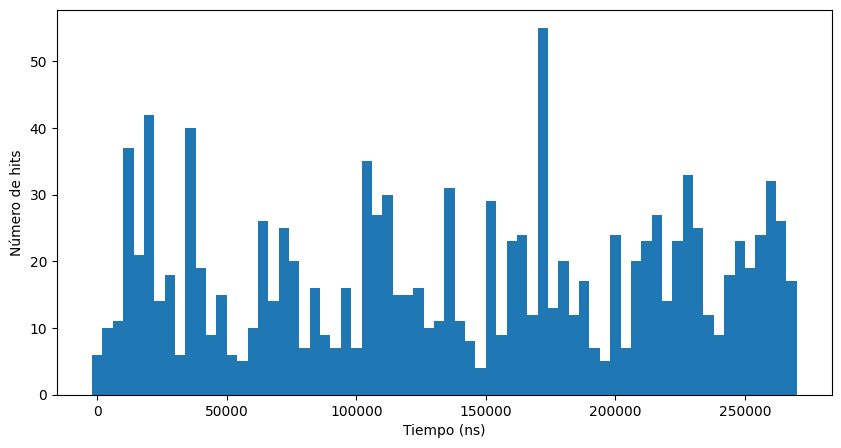

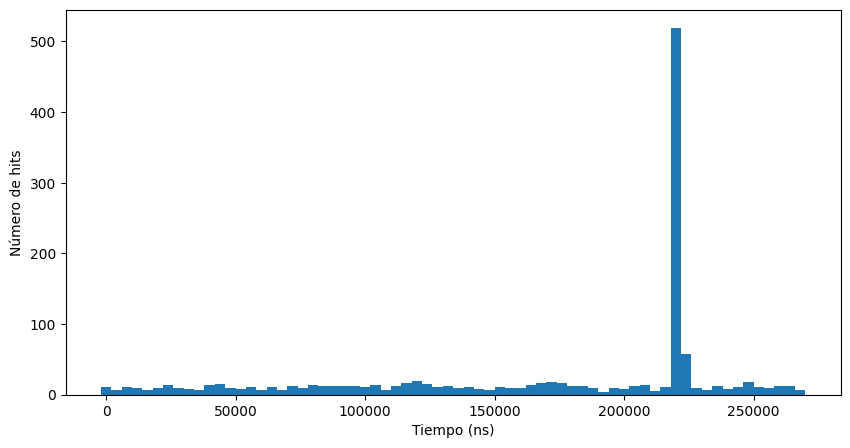

In [33]:
print(nHits_sig.shape)
print(nHits_bkg.shape)

plt.figure(figsize=(10, 5))
plt.bar(times_array, nHits_sig[0,::], width=bin_hits)
plt.ylabel('Número de hits')
plt.xlabel('Tiempo (ns)')

plt.figure(figsize=(10, 5))
plt.bar(times_array, nHits_bkg[0,::], width=bin_hits)
plt.ylabel('Número de hits')
plt.xlabel('Tiempo (ns)')

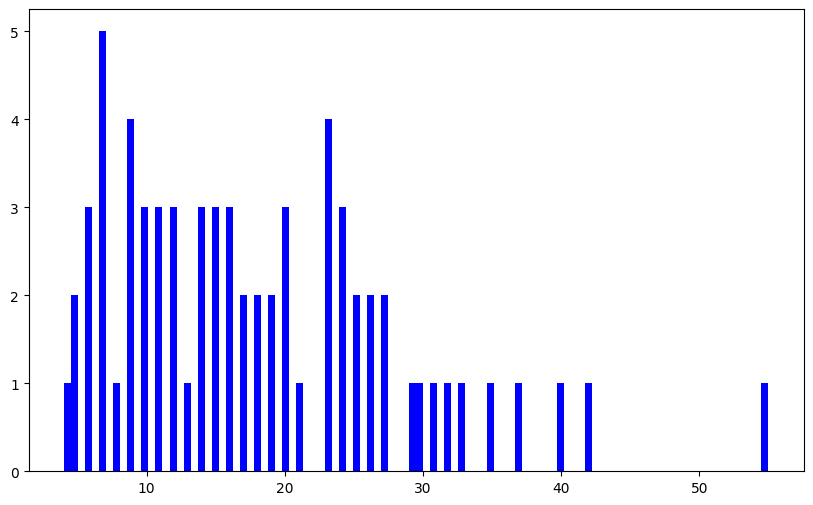

[ 6. 10. 11. 37. 21. 42. 14. 18.  6. 40. 19.  9. 15.  6.  5. 10. 26. 14.
 25. 20.  7. 16.  9.  7. 16.  7. 35. 27. 30. 15. 15. 16. 10. 11. 31. 11.
  8.  4. 29.  9. 23. 24. 12. 55. 13. 20. 12. 17.  7.  5. 24.  7. 20. 23.
 27. 14. 23. 33. 25. 12.  9. 18. 23. 19. 24. 32. 26. 17.]


In [34]:
plt.figure(figsize=(10, 6))
plt.hist(nHits_sig[0,::], bins=100, label='Signal', color='blue')
plt.show()

print(nHits_sig[0,::])

In [35]:
bin_hist = 50

hist_nHits_sig = np.zeros(int(5000/bin_hist))
hist_nHits_bkg = np.zeros(int(5000/bin_hist))

event_number_branch_sig = tree_sig["event_number"].array(library="np")
event_number_branch_bkg = tree_bkg["event_number"].array(library="np")

for event in event_number_branch_sig:
    hist_nHits_sig = functions_nHits.count_nHits(nHits_sig[event, :], bin_hist, hist_nHits_sig)

for event in event_number_branch_bkg:
    hist_nHits_bkg = functions_nHits.count_nHits(nHits_bkg[event, :], bin_hist, hist_nHits_bkg)


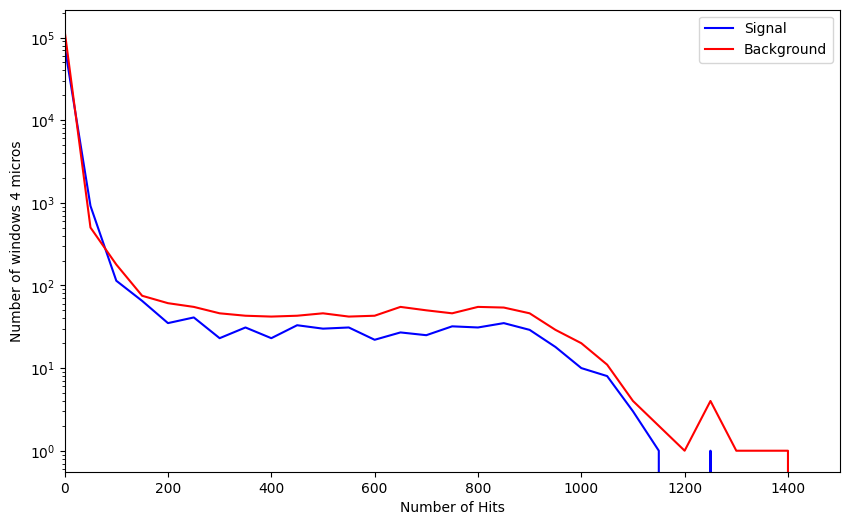

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, 5000, bin_hist), hist_nHits_sig, label='Signal', color='blue')
plt.plot(np.arange(0, 5000, bin_hist), hist_nHits_bkg, label='Background', color='red')
plt.xlabel('Number of Hits')
plt.ylabel('Number of windows 4 micros')
plt.yscale('log')
plt.xlim(0,1500)
plt.legend()
plt.show()

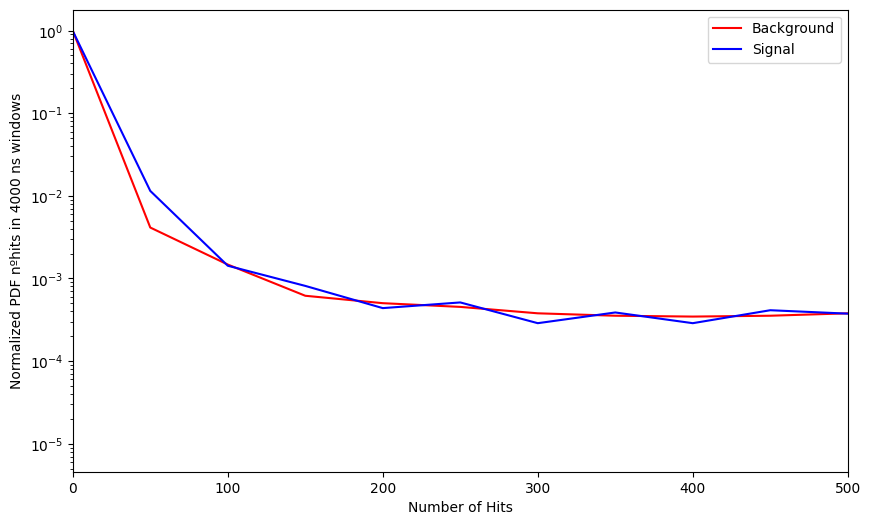

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, 5000, bin_hist), hist_nHits_bkg/(len(values_bkg)*(270000/bin_hits)), label='Background', color='red')
plt.plot(np.arange(0, 5000, bin_hist), hist_nHits_sig/(len(values_sig)*(270000/bin_hits)), label='Signal', color='blue')
plt.xlabel('Number of Hits')
plt.ylabel(f'Normalized PDF nºhits in {bin_hits} ns windows')
plt.legend()
plt.yscale('log')

plt.xlim(0,500)
plt.show()